In [1]:
import os
os.chdir("/home/v-runmao/projects/R-Drop/vit_src/data/")

In [11]:
from torchvision.datasets import CIFAR100
from torch.utils.data import Dataset, DataLoader, DistributedSampler
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

100 26 59


<BarContainer object of 100 artists>

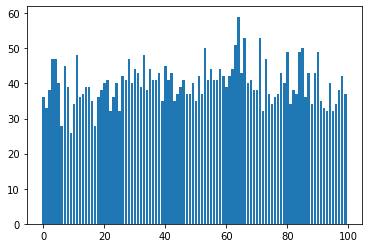

In [23]:
cifar = CIFAR100(root="./", train=True)

y_cnt = defaultdict(lambda: 0)
for i in range(4000):
    x, y = cifar[i]
    y_cnt[y] += 1

ys, cnts = zip(*sorted(y_cnt.items(), key=lambda ele: ele[0]))
print(len(ys), min(cnts), max(cnts))
plt.bar(ys, cnts)

# Semi-supervised dataset

In [56]:
class ReducedCIFAR100(CIFAR100):
    def __init__(self, size=-1, **kwargs):
        super().__init__(**kwargs)
        if size > 0 and size < len(self.data):
            self.data = self.data[:size]
            self.targets = self.targets[:size]
    def __getitem__(self, index):
        x, y = super().__getitem__(index)
        return index

In [57]:
supv_data = ReducedCIFAR100(size=4000, root="./", train=True)
unsupv_data = ReducedCIFAR100(size=-1, root="./", train=True)

In [58]:
len(supv_data), len(unsupv_data)

(4000, 50000)

In [59]:
supv_loader = DataLoader(supv_data, batch_size=64, shuffle=True, drop_last=False)
unsupv_loader = DataLoader(unsupv_data, batch_size=64*7, shuffle=True, drop_last=False)

In [60]:
len(supv_loader), len(unsupv_loader)

(63, 112)

In [61]:
class SemiSupvDataLoader:
    def __init__(self, supv_loader, unsupv_loader):
        self.supv_loader = supv_loader
        self.unsupv_loader = unsupv_loader
        self.supv_iter = None
        self.unsupv_iter = iter(self.unsupv_loader)
        
    def __len__(self):
        return len(self.supv_loader)
    
    def __iter__(self):
        self.supv_iter = iter(self.supv_loader)
        return self
    
    def __next__(self):
        supv_data = next(self.supv_iter)
        try:
            unsupv_data = next(self.unsupv_iter)
        except StopIteration:
            self.unsupv_iter = iter(self.unsupv_loader)
            unsupv_data = next(self.unsupv_iter)
        return (supv_data, unsupv_data)

In [68]:
loader = SemiSupvDataLoader(supv_loader, unsupv_loader)

In [69]:
for i, data in enumerate(loader):
    print(i)
    print(data[0].shape)
    print(data[1].shape)
    print("=" * 80)

0
torch.Size([64])
torch.Size([448])
1
torch.Size([64])
torch.Size([448])
2
torch.Size([64])
torch.Size([448])
3
torch.Size([64])
torch.Size([448])
4
torch.Size([64])
torch.Size([448])
5
torch.Size([64])
torch.Size([448])
6
torch.Size([64])
torch.Size([448])
7
torch.Size([64])
torch.Size([448])
8
torch.Size([64])
torch.Size([448])
9
torch.Size([64])
torch.Size([448])
10
torch.Size([64])
torch.Size([448])
11
torch.Size([64])
torch.Size([448])
12
torch.Size([64])
torch.Size([448])
13
torch.Size([64])
torch.Size([448])
14
torch.Size([64])
torch.Size([448])
15
torch.Size([64])
torch.Size([448])
16
torch.Size([64])
torch.Size([448])
17
torch.Size([64])
torch.Size([448])
18
torch.Size([64])
torch.Size([448])
19
torch.Size([64])
torch.Size([448])
20
torch.Size([64])
torch.Size([448])
21
torch.Size([64])
torch.Size([448])
22
torch.Size([64])
torch.Size([448])
23
torch.Size([64])
torch.Size([448])
24
torch.Size([64])
torch.Size([448])
25
torch.Size([64])
torch.Size([448])
26
torch.Size([64])
to

In [70]:
for i, data in enumerate(loader):
    print(i)
    print(data[0].shape)
    print(data[1].shape)
    print("=" * 80)

0
torch.Size([64])
torch.Size([448])
1
torch.Size([64])
torch.Size([448])
2
torch.Size([64])
torch.Size([448])
3
torch.Size([64])
torch.Size([448])
4
torch.Size([64])
torch.Size([448])
5
torch.Size([64])
torch.Size([448])
6
torch.Size([64])
torch.Size([448])
7
torch.Size([64])
torch.Size([448])
8
torch.Size([64])
torch.Size([448])
9
torch.Size([64])
torch.Size([448])
10
torch.Size([64])
torch.Size([448])
11
torch.Size([64])
torch.Size([448])
12
torch.Size([64])
torch.Size([448])
13
torch.Size([64])
torch.Size([448])
14
torch.Size([64])
torch.Size([448])
15
torch.Size([64])
torch.Size([448])
16
torch.Size([64])
torch.Size([448])
17
torch.Size([64])
torch.Size([448])
18
torch.Size([64])
torch.Size([448])
19
torch.Size([64])
torch.Size([448])
20
torch.Size([64])
torch.Size([448])
21
torch.Size([64])
torch.Size([448])
22
torch.Size([64])
torch.Size([448])
23
torch.Size([64])
torch.Size([448])
24
torch.Size([64])
torch.Size([448])
25
torch.Size([64])
torch.Size([448])
26
torch.Size([64])
to

Bad pipe message: %s [b'jU\x10\xc6\x89HB\x99X\x99b\x83Z\xce)\xac\n\x15\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0']
Bad pipe message: %s [b"'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00"]
Bad pipe message: %s [b'\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00\x05\x00\n\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02